In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

import scipy.stats as st


Vamos a tomar la transformación de un ranking en dos tiempos distintos y con ello construir una red. 

Digamos que tenemos un ranking a un tiempo $t_1$ y el mismo ranking pero a un tiempo $t_2 > t_1$. Lo que nos interesa es como cambiaron de lugar los elementos del ranking en ese salto de tiempo.

Lo que haremos es crear una red en la que los nodos son los elementos del ranking que están en los dos tiempos (es decir, omitimos los elementos que estaban a $t_1$ y desaparecieron a $t_2$, o que aparecieron en $t_2$ pero no estaban antes).

Luego, dos nodos estarán conectados por una linea si su posición relativa cambió entre el tiempo $t_1$ y $t_2$. 

Por ejemoplo, consideremos que el ranking es el de las selecciones de FIFA y los tiempos $t_1, t_2$ son $2014$ y $2015$.Entonces, si por ejemplo, Brasil estaba arriba de Alemania en $2014$ pero en $2015$ Alemania estaba arriba de Brasil, conectaremos los nodos de Brasil y Alemania. Pero, si Argentina estaba arriba de México en $2014$ y seguía arriba an $2015$, no conectamos los nodos de México y Argentina.


### Ejemplo 1: Tennis

Por ejemplo, aquí hay información de jugadores de Tennis (encontrado en Kaggle), que tiene el ranking de tenistas para distintas fechas

In [2]:
df = pd.read_csv('Datos/tennis.csv')
df.head(60)

c:\users\tbasi\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Gender,Type,Ranking,Player,Country,Age,Points,Tournaments
0,1990-01-01,men,singles,1,Ivan Lendl,USA,29,0,0
1,1990-01-01,men,singles,2,Boris Becker,GER,22,0,0
2,1990-01-01,men,singles,3,Stefan Edberg,SWE,23,0,0
3,1990-01-01,men,singles,4,Brad Gilbert,USA,28,0,0
4,1990-01-01,men,singles,5,John McEnroe,USA,30,0,0
5,1990-01-01,men,singles,6,Michael Chang,USA,17,0,0
6,1990-01-01,men,singles,7,Aaron Krickstein,USA,22,0,0
7,1990-01-01,men,singles,8,Andre Agassi,USA,19,0,0
8,1990-01-01,men,singles,9,Jay Berger,USA,23,0,0
9,1990-01-01,men,singles,10,Alberto Mancini,ARG,20,0,0


In [3]:
# Por ejemplo, las últimas 20 fechas en las que hay ranking son:
np.unique(df["Date"])[-60::]

array(['2018-06-11', '2018-06-18', '2018-06-25', '2018-07-02',
       '2018-07-16', '2018-07-23', '2018-07-30', '2018-08-06',
       '2018-08-13', '2018-08-20', '2018-08-27', '2018-09-10',
       '2018-09-17', '2018-09-24', '2018-10-01', '2018-10-08',
       '2018-10-15', '2018-10-22', '2018-10-29', '2018-11-05',
       '2018-11-12', '2018-11-19', '2018-11-26', '2018-12-03',
       '2018-12-10', '2018-12-17', '2018-12-24', '2018-12-31',
       '2019-01-07', '2019-01-14', '2019-01-28', '2019-02-04',
       '2019-02-11', '2019-02-18', '2019-02-25', '2019-03-04',
       '2019-03-11', '2019-03-18', '2019-04-01', '2019-04-08',
       '2019-04-15', '2019-04-22', '2019-04-29', '2019-05-06',
       '2019-05-13', '2019-05-20', '2019-05-27', '2019-06-10',
       '2019-06-17', '2019-06-24', '2019-07-01', '2019-07-15',
       '2019-07-22', '2019-07-29', '2019-08-05', '2019-08-12',
       '2019-08-19', '2019-08-26', '2019-09-09', '2019-09-16'],
      dtype=object)

In [4]:
# Primero vamos a agarrar el Ranking de la última fecha disponible:
# Agarramos los datos con fecha de 2019-09-16
df_ult = df[df["Date"]=='2019-09-16']

# Nos quedamos solamente con la columna de ranking y las del nombre
df_ult = df_ult[["Ranking","Player"]]
df_ult

,Ranking,Player
149490,1,Novak Djokovic
149491,2,Rafael Nadal
149492,3,Roger Federer
149493,4,Daniil Medvedev
149494,5,Dominic Thiem
...,...,...
149585,96,Corentin Moutet
149586,97,Bradley Klahn
149587,98,Gregoire Barrere
149588,99,Leonardo Mayer


In [5]:
# Para el tiempo anterior, tomaré datos de aprox un año antes, es decir
# 2018-09-17

df_ant = df[df["Date"]=='2018-09-17']
df_ant = df_ant[["Ranking","Player"]]
df_ant

,Ranking,Player
144790,1,Rafael Nadal
144791,2,Roger Federer
144792,3,Novak Djokovic
144793,4,Juan Martin del Potro
144794,5,Alexander Zverev
...,...,...
144885,96,Yuki Bhambri
144886,97,Guido Andreozzi
144887,98,Jared Donaldson
144888,99,Yuichi Sugita


In [6]:
# Vamos a ver cuales son los jugadores que están en ambas listas
# Para usarlos para la red

#Pero antes, voy a ordenar las listas alfabéticamente
df_ant = df_ant.sort_values(by=['Player'])
df_ult = df_ult.sort_values(by=['Player'])

# nodos va a ser la lista de nombres que se repiten en ambas listas  
nodos = np.intersect1d(np.unique(df_ant["Player"]),np.unique(df_ult["Player"]))
len(nodos)

71

In [7]:
## Hacemos ahora una lista de los rankings de los jugadores dentro de "nodos"
# para el tiempo ultimo y el tiempo ant

lista_ant =  np.array(df_ant.loc[df_ant['Player'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Player'].isin(nodos)])[: , 0]

print("lista_ant:", lista_ant)
print("")
print("lista_ult:", lista_ult)

lista_ant: [32 54 38 5 76 47 69 53 18 93 74 28 35 11 34 14 8 55 13 72 29 33 40 42 39
 7 60 95 50 41 71 49 10 37 4 24 12 9 16 86 52 90 19 22 6 81 65 43 62 87 20
 27 46 31 3 21 67 45 36 68 1 25 26 94 2 59 88 15 30 64 58]

lista_ult: [59 46 31 6 76 74 38 23 15 97 68 86 4 14 33 16 5 29 11 54 35 49 43 12 37
 25 22 36 39 73 61 64 20 94 72 9 8 18 32 40 99 51 26 67 28 87 90 66 13 57
 24 27 75 17 1 62 44 89 79 55 2 41 10 77 3 45 19 7 95 30 69]


Esas listas tienen el rank de los jugadores (ordenados segun vienen en la lista "nodos").

Con eso, ya podemos construir la matriz de Adyacencia

In [8]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


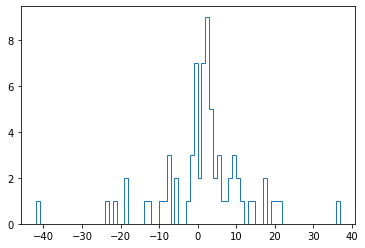

Degree promedio:  1.1830985915492958
Std de degrees:  11.114398552664143
Densidad: 0.31388329979879276
Info: Graph with 71 nodes and 780 edges
Average Clustering: 0.5974787220320238
Degrees de los nodos ordenados de mayor a menor:


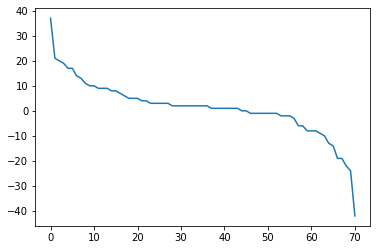

In [9]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 2: Olimpiadas

In [10]:
# Hacemos lo mismo para los resultados de olimpiadas
# Para cada año, hasta 2012, esta lista tiene el ranking de la 
# posición en la que quedaron los países. 

df = pd.read_csv('Datos/olympics.xls')
df.head(10)

,Rank,Year,Country,Golds,Silvers,Bronzes,Medals
0,1,1984,United States,82,61,30,173
1,1,1980,Former Soviet Union / Russian Empire,80,69,46,195
2,1,1904,United States,77,82,74,233
3,1,1908,United Kingdom,56,50,37,143
4,1,1988,Former Soviet Union / Russian Empire,54,31,46,131
5,1,1972,Former Soviet Union / Russian Empire,50,27,22,99
6,1,1976,Former Soviet Union / Russian Empire,49,41,35,125
7,1,2008,China,49,21,28,98
8,2,1980,East Germany,47,37,42,126
9,1,2012,United States,47,27,30,104


In [11]:
# Los ultimos datos son de 2012
df_ult = df[df["Year"]==2012]
df_ult = df_ult[["Rank","Country"]]
df_ult = df_ult.sort_values(by=['Country'])
df_ult

,Rank,Country
1144,79,Afghanistan
744,50,Algeria
625,42,Argentina
905,65,Armenia
142,8,Australia
...,...,...
211,14,Ukraine
39,3,United Kingdom
9,1,United States
1041,76,Uzbekistan


In [12]:
# Los anteriores son de 2008
df_ant = df[df["Year"]==2008]
df_ant = df_ant[["Rank","Country"]]
df_ant = df_ant.sort_values(by=['Country'])
df_ant

,Rank,Country
1151,81,Afghanistan
900,65,Algeria
505,35,Argentina
1001,78,Armenia
73,6,Australia
...,...,...
24,2,United States
798,57,Uzbekistan
1156,81,Venezuela
993,70,Vietnam


In [13]:
nodos = np.intersect1d(np.unique(df_ant["Country"]),np.unique(df_ult["Country"]))
len(nodos)

72

In [14]:
lista_ant =  np.array(df_ant.loc[df_ant['Country'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Country'].isin(nodos)])[: , 0]

print("lista_ant:", lista_ant)
print("")
print("lista_ult:", lista_ult)

lista_ant: [81 65 35 78 6 40 65 16 37 23 42 51 20 1 59 57 28 24 30 46 80 46 19 44 10
 27 5 59 21 49 42 50 62 9 14 8 29 13 45 55 70 36 33 65 12 26 31 22 17 46
 18 3 62 70 24 41 70 7 15 54 34 79 65 32 61 51 38 11 4 2 57 81]

lista_ult: [79 50 42 65 8 32 50 28 64 22 60 79 27 2 38 26 16 19 31 47 56 65 23 60 7
 40 6 76 10 57 60 13 41 9 18 11 24 30 48 34 65 38 58 79 12 15 21 35 24 70
 29 4 42 76 63 42 20 5 17 37 33 48 79 59 42 36 46 14 3 1 76 50]


In [15]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


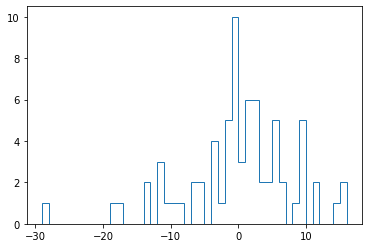

Degree promedio:  -0.5
Std de degrees:  7.968688725254614
Densidad: 0.19483568075117372
Info: Graph with 72 nodes and 498 edges
Average Clustering: 0.47493922352936657
Degrees de los nodos ordenados de mayor a menor:


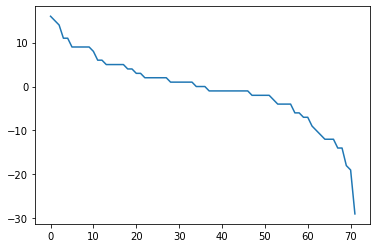

In [16]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 3: CWUR
Lista de las mejores universidades del mundo


In [51]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df = pd.read_csv('Datos/CWUR.csv')
df.head(10)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,research_performance,score,year,research_output,quality_publications,influence,citations,publications,broad_impact,patents
0,1,Harvard University,USA,1,2.0,1.0,1.0,1.0,100.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Massachusetts Institute of Technology,USA,2,1.0,10.0,2.0,5.0,96.7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Stanford University,USA,3,9.0,3.0,3.0,2.0,95.2,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,University of Cambridge,United Kingdom,1,4.0,19.0,5.0,11.0,94.1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Oxford,United Kingdom,2,10.0,24.0,10.0,4.0,93.3,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,Columbia University,USA,4,13.0,12.0,8.0,12.0,92.6,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,Princeton University,USA,5,6.0,14.0,6.0,54.0,92.0,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,"University of California, Berkeley",USA,6,5.0,48.0,9.0,6.0,91.6,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,University of Pennsylvania,USA,7,15.0,8.0,30.0,14.0,91.1,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,University of Chicago,USA,8,11.0,18.0,19.0,16.0,90.7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# El ultimo año es 2019
df_ult = df[df["year"]==2019]
df_ult = df_ult[["world_rank","institution"]]
df_ult = df_ult.sort_values(by=['institution'])
df_ult

,world_rank,institution
672,673,AGH University of Science and Technology
366,367,Aalborg University
309,310,Aalto University
94,95,Aarhus University
703,704,Aberystwyth University
...,...,...
465,466,École normale supérieure de Lyon
746,747,Örebro University
1554,1555,Özyeğin University
1769,1770,İnönü University


In [53]:
df_ant = df[df["year"]==2018]
df_ant = df_ant[["world_rank","institution"]]
df_ant = df_ant.sort_values(by=['institution'])
df_ant

,world_rank,institution
2632,633,AGH University of Science and Technology
2452,453,Aalborg University
2354,355,Aalto University
2087,88,Aarhus University
2919,920,Aberystwyth University
...,...,...
2116,117,École normale supérieure
2655,656,École normale supérieure Paris-Saclay
2418,419,École normale supérieure de Lyon
2735,736,École pratique des hautes études


In [54]:
nodos = np.intersect1d(np.unique(df_ant["institution"]),np.unique(df_ult["institution"]))
len(nodos)

945

In [55]:
lista_ant =  np.array(df_ant.loc[df_ant['institution'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['institution'].isin(nodos)])[: , 0]
lista_ult

array([673, 367, 310, 95, 704, 831, 852, 495, 793, 151, 709, 977, 649,
       458, 778, 987, 683, 417, 166, 770, 1262, 599, 687, 108, 195, 277,
       881, 823, 743, 490, 123, 505, 342, 906, 386, 723, 346, 507, 810,
       742, 335, 542, 843, 753, 694, 428, 74, 700, 147, 525, 45, 594, 862,
       536, 11, 473, 992, 139, 786, 561, 787, 84, 114, 648, 451, 661, 323,
       350, 377, 538, 237, 924, 530, 382, 422, 866, 577, 952, 491, 799,
       623, 324, 188, 653, 891, 460, 455, 486, 1089, 1108, 646, 874, 626,
       446, 284, 884, 230, 514, 528, 433, 233, 6, 651, 249, 575, 14, 804,
       966, 360, 652, 321, 327, 986, 49, 402, 236, 1124, 886, 714, 339,
       1048, 23, 294, 684, 29, 838, 434, 395, 1421, 795, 877, 317, 90, 98,
       1102, 503, 598, 926, 910, 1037, 452, 754, 858, 880, 454, 349, 662,
       1029, 938, 544, 888, 890, 1077, 509, 956, 494, 260, 931, 71, 132,
       611, 922, 873, 841, 399, 287, 203, 82, 515, 136, 915, 155, 764,
       727, 145, 379, 999, 965, 937, 668, 757, 18

In [56]:
G = nx.Graph()
for i in range(len(nodos)):
    G.add_node(i)

for i in range(len(nodos)):
    for j in range(i+1,len(nodos)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


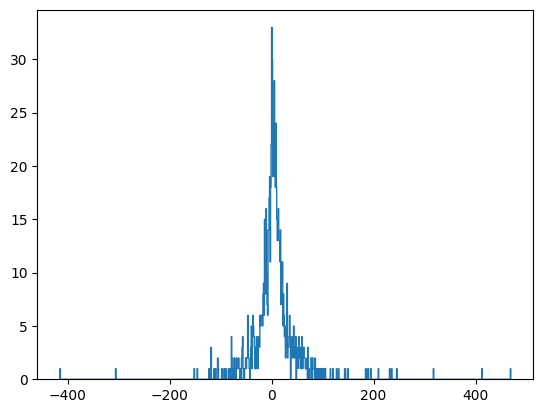

Degree promedio:  5.216931216931217
Std de degrees:  48.52447731319812
Densidad: 0.07422876872029414
Info: Graph with 945 nodes and 33109 edges


/tmp/ipykernel_33519/3758167684.py:8: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print("Info:", nx.info(G))


Average Clustering: 0.5994372438651466
Degrees de los nodos ordenados de mayor a menor:


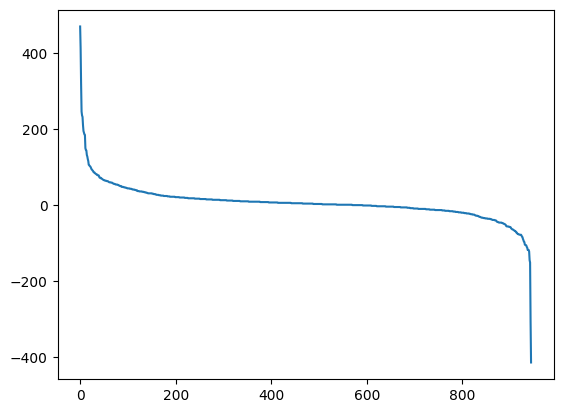

In [57]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


In [19]:
print(degrees)

[469, 412, 317, 245, 235, 231, 209, 194, 189, 185, 184, 149, 144, 143, 131, 127, 120, 115, 105, 104, 102, 101, 99, 96, 93, 92, 90, 89, 86, 85, 85, 83, 82, 81, 80, 80, 78, 78, 77, 77, 73, 71, 71, 71, 69, 69, 68, 67, 66, 65, 65, 64, 64, 63, 63, 63, 62, 62, 62, 61, 60, 59, 59, 59, 59, 58, 58, 58, 57, 56, 55, 55, 55, 54, 54, 53, 53, 53, 53, 52, 52, 51, 50, 50, 49, 49, 49, 47, 47, 47, 47, 46, 46, 46, 45, 45, 45, 44, 44, 43, 43, 43, 43, 43, 42, 42, 42, 42, 41, 41, 40, 40, 40, 40, 39, 39, 39, 38, 38, 38, 36, 36, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 33, 33, 33, 32, 32, 32, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29, 29, 28, 28, 28, 28, 27, 27, 26, 26, 26, 26, 26, 25, 25, 25, 25, 24, 24, 24, 24, 24, 24, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 20, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 18, 18, 18, 18, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 16, 1

### Ejemplo 4: Libertad de prensa


In [24]:
df = pd.read_csv('Datos/Press.csv')
df.head(10)

,Country,ISO Code,Region,Position 2022,Position 2021,Global Score,Politic Score,Economic Score,Legislative Score,Social Score,Security Score,Journalist Killed,Media Workers Killed,Journalist Imprisoned,Media Workers Imprisoned,Situation
0,Afghanistan,AFG,Asia Pacific,156,122,38.27,44.65,43.88,42.54,43.33,16.96,0,0,0,0,Very Serious
1,Albania,ALB,Europe,103,83,56.41,50.55,29.39,68.77,66.60,66.75,0,0,0,0,Problematic
2,Algeria,DZA,Arab States,134,146,45.53,41.21,32.40,54.17,55.88,44.02,0,0,0,0,Difficult
3,Andorra,AND,Europe,53,39,68.79,68.12,50.41,69.12,68.80,87.48,0,0,0,0,Problematic
4,Angola,AGO,Africa,99,103,57.17,52.83,35.03,61.11,73.00,63.87,0,0,0,0,Problematic
5,Argentina,ARG,South America,29,69,77.28,76.36,51.53,90.68,85.75,82.06,0,0,0,0,Satisfactory
6,Armenia,ARM,Europe,51,63,68.97,66.26,44.44,77.88,76.33,79.91,0,0,0,0,Problematic
7,Australia,AUS,Asia Pacific,39,25,73.77,77.17,63.44,64.18,84.17,79.88,0,0,0,0,Satisfactory
8,Austria,AUT,Europe,31,17,76.74,77.82,61.43,78.95,81.20,84.29,0,0,0,0,Satisfactory
9,Azerbaijan,AZE,Asia Pacific,154,167,39.40,37.66,23.76,48.25,58.86,28.48,0,0,2,0,Very Serious


In [25]:
lista_ult = np.array(df[["Position 2022"]])[:,0]
lista_ant = np.array(df[["Position 2021"]])[:,0]
lista_ant

array([122,  83, 146,  39, 103,  69,  63,  25,  17, 167, 168, 152, 158,
        11,  53, 114,  65, 110,  58,  38, 111, 154, 112,  37, 147,  27,
       144, 135,  14, 126, 123,  54, 177, 134,  84, 118,   5,  56, 171,
        26,  40, 149,   4, 176,  50,  96, 166,  82, 164, 180,  15, 141,
       101,  55,   2,  34, 117,  85,  60,  13,  30,  70, 116, 109,  95,
        51,  87, 151,  80,  92,  16, 142, 113, 174, 163,  12,  86,  41,
        66,   7,  67, 129, 155, 102,  78, 105,  79, 172,  22, 107,  88,
        98, 165,  23,  28,  20,  57,  62, 119,  72,  99,  81,  94,  61,
       143,  89,  68, 104, 136, 108, 140,  24, 106,   6,   8, 121,  59,
       120, 179,  90,  76,   1,  45, 133, 145, 132,  77,  47, 100,  91,
       138,  64,   9, 128,  48, 150, 156,  21, 170,  49,  93,  52,  75,
       160,  35,  36, 161,  32,  42, 139,  29, 127, 159,  19,   3,  10,
       173,  43, 162, 124, 137,  71,  74,  46,  31,  73, 153, 178, 125,
        97, 131,  33,  44,  18, 157, 148, 175, 169, 115, 130], d

In [26]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


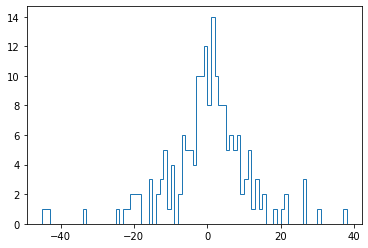

Degree promedio:  -0.4
Std de degrees:  11.189578484762807
Densidad: 0.11719428926132837
Info: Graph with 180 nodes and 1888 edges
Average Clustering: 0.5551416766246117
Degrees de los nodos ordenados de mayor a menor:


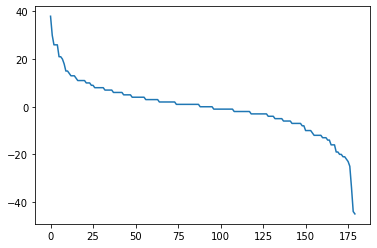

In [27]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 5:  Empresas del fortune 500

In [28]:
df21 = pd.read_csv('Datos/fortune21.csv')
df21.head(10)

,Unnamed: 0,Rank,Name,Revenue,revenue(% change),profits in millions,profits % change,assets,market value,change in rank in 1000,employees,change in rank(500 only),measure_up_rank
0,0,1,Walmart,"$559,151",0.067,"$13,510",-0.092,"$252,496","$382,642.8",-,2300000,-,20
1,1,2,Amazon,"$386,064",0.376,"$21,331",0.841,"$321,195","$1,558,069.6",-,1298000,-,11
2,2,3,Apple,"$274,515",0.055,"$57,411",0.039,"$323,888","$2,050,665.9",1,147000,1,188
3,3,4,CVS Health,"$268,706",0.046,"$7,179",0.082,"$230,715","$98,653.2",1,256500,1,57
4,4,5,UnitedHealth Group,"$257,141",0.062,"$15,403",0.113,"$197,289","$351,725",2,330000,2,25
5,5,6,Berkshire Hathaway,"$245,510",-0.036,"$42,521",-0.478,"$873,729","$587,823",-,360000,-,-
6,6,7,McKesson,"$231,051",0.078,$900,25.471,"$61,247","$31,044",1,70000,1,205
7,7,8,AmerisourceBergen,"$189,893.9",0.057,"$-3,408.7",-4.985,"$44,274.8","$24,169.7",2,21500,2,120
8,8,9,Alphabet,"$182,527",0.128,"$40,269",0.173,"$319,616","$1,392,561.8",2,135301,2,215
9,9,10,Exxon Mobil,"$181,502",-0.315,"$-22,440",-2.565,"$332,750","$236,355.4",-7,72000,-7,327


In [29]:
df22 = pd.read_csv('Datos/fortune22.csv')
df22.head(10)

,rank in 2022,Name,Revenue,revenue(% change),profits in millions,profits % change\r,assets,market value,change in rank of top 1000 companies,employees,change in rank(500 only)\r\n
0,1,Walmart,"$572,754",2.40%,"$13,673",1.20%,"$244,860","$409,795",-,"2,300,000",-
1,2,Amazon,"$469,822",21.70%,"$33,364",56.40%,"$420,549","$1,658,807.30",-,"1,608,000",-
2,3,Apple,"$365,817",33.30%,"$94,680",64.90%,"$351,002","$2,849,537.60",-,"154,000",-
3,4,CVS Health,"$292,111",8.70%,"$7,910",10.20%,"$232,999","$132,839.20",-,"258,000",-
4,5,UnitedHealth Group,"$287,597",11.80%,"$17,285",12.20%,"$212,206","$479,830.30",-,"350,000",-
5,6,Exxon Mobil,"$285,640",57.40%,"$23,040",-,"$338,923","$349,652.40",4,"63,000",4
6,7,Berkshire Hathaway,"$276,094",12.50%,"$89,795",111.20%,"$958,784","$779,542.30",-1,"372,000",-1
7,8,Alphabet,"$257,637",41.20%,"$76,033",88.80%,"$359,268","$1,842,326.10",1,"156,500",1
8,9,McKesson,"$238,228",3.10%,"-$4,539",-604.30%,"$65,015","$45,857.80",-2,"67,500",-2
9,10,AmerisourceBergen,"$213,988.80",12.70%,"$1,539.90",-,"$57,337.80","$32,355.70",-2,"40,000",-2


In [30]:
# Nos quedamos solamente con la columna de ranking y las del nombre
df_ult = df22[["rank in 2022","Name"]]
df_ant = df21[["Rank","Name"]]
df_ant

,Rank,Name
0,1,Walmart
1,2,Amazon
2,3,Apple
3,4,CVS Health
4,5,UnitedHealth Group
...,...,...
995,996,Surgery Partners
996,997,Entegris
997,998,Sleep Number
998,999,Spire


In [31]:

df_ant = df_ant.sort_values(by=['Name'])
df_ult = df_ult.sort_values(by=['Name'])

nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

918

In [32]:
## Hacemos ahora una lista de los rankings de los jugadores dentro de "nodos"
# para el tiempo ultimo y el tiempo ant

lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 0]

print("lista_ant:", lista_ant)
print("")
print("lista_ult:", lista_ult)

lista_ant: [96 495 767 462 504 189 313 331 779 862 595 656 681 622 11 68 89 724 475
 709 373 696 234 301 309 718 945 951 131 502 340 688 711 661 723 52 330
 890 850 339 749 680 943 70 287 9 306 138 2 939 620 469 174 547 642 204
 857 83 232 376 636 375 640 957 253 8 566 112 793 525 349 481 366 672 23
 938 3 701 176 759 235 755 476 889 102 416 405 869 302 708 778 341 145 238
 637 392 208 896 438 774 417 702 498 168 198 932 140 260 29 180 257 264
 420 931 177 280 964 950 6 261 66 449 829 228 192 323 714 727 54 493 424
 391 295 790 305 916 884 353 650 736 75 121 568 665 814 689 958 592 350
 471 191 473 122 161 609 103 537 430 632 292 615 4 813 805 675 935 903 335
 496 99 136 14 599 758 171 745 483 371 728 78 679 477 24 342 804 717 490
 986 760 251 64 959 944 527 328 513 27 403 464 535 666 13 386 410 63 33
 381 707 721 1000 501 427 93 526 185 188 841 26 729 776 356 492 259 646
 283 604 156 249 359 818 870 910 557 277 214 12 426 854 593 833 904 467
 269 150 863 148 442 197 250 152 271 408 13

In [33]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


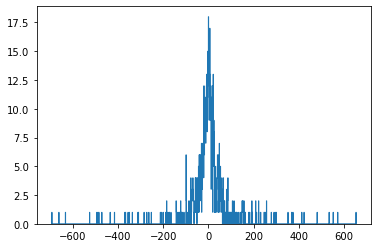

Degree promedio:  -0.4749455337690632
Std de degrees:  103.80164238916292
Densidad: 0.16629484703126374
Info: Graph with 918 nodes and 69994 edges
Average Clustering: 0.5943312017531929
Degrees de los nodos ordenados de mayor a menor:


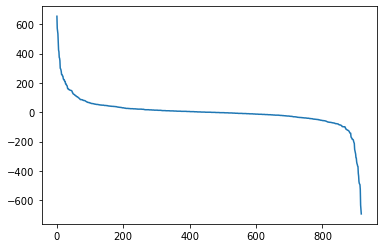

In [34]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 6: Golf

In [35]:
df = pd.read_csv('Datos/golf.csv')[1:1500]
df.tail(10)

,Week,This_Week,Last_Week,End_2019,Name,Average_Points,Total_Points,Events_Played_Divisor,Points_Lost_2020,Points_Gained_2020,Events_Played_Actual,Pro/Am
1490,11,1489,1487.0,1468.0,Anthony Maccaglia,0.0358,1.43,40,-0.23,NaN,20,Pro
1491,11,1492,1493.0,1485.0,Masamichi Ito,0.0357,1.43,40,-0.17,NaN,16,Pro
1492,11,1493,1481.0,1438.0,Albin Choi,0.0355,1.46,41,-0.62,NaN,41,Pro
1493,11,1493,1495.0,1516.0,Karl Ochse,0.0355,1.42,40,-0.08,NaN,17,Pro
1494,11,1495,1470.0,1372.0,Christian Brand,0.0354,1.42,40,-1.00,NaN,40,Pro
1495,11,1495,1491.0,1441.0,Xavi Puig,0.0354,1.42,40,-0.38,NaN,11,Pro
1496,11,1497,1474.0,1316.0,Alexandre Daydou,0.0352,1.41,40,-0.94,NaN,23,Pro
1497,11,1497,1496.0,1484.0,Samuel Stevens,0.0352,1.41,40,-0.19,NaN,18,Pro
1498,11,1497,1493.0,1446.0,Cole Miller,0.0352,1.41,40,-0.39,NaN,23,Pro
1499,11,1500,1505.0,2074.0,Shergo Kurdi,0.0350,1.40,40,NaN,1.4,12,Am


In [36]:
df_ult = df[["End_2019","Name"]].dropna()
df_ult = df_ult.sort_values(by=['Name'])
df_ult

,End_2019,Name
655,1069.0,Aadil Bedi
267,252.0,Aaron Baddeley
773,750.0,Aaron Cockerill
421,402.0,Aaron Pike
213,170.0,Aaron Rai
...,...,...
465,439.0,Zhang Huilin
1232,1153.0,Zhang Jia
137,131.0,Zhang Xinjun
1031,1013.0,Zhou Guowu


In [37]:
df_ant = df[["This_Week","Name"]].dropna()
df_ant = df_ant.sort_values(by=['Name'])
df_ant

,This_Week,Name
655,656,Aadil Bedi
267,268,Aaron Baddeley
773,774,Aaron Cockerill
421,422,Aaron Pike
213,214,Aaron Rai
...,...,...
465,466,Zhang Huilin
1232,1233,Zhang Jia
137,138,Zhang Xinjun
1031,1032,Zhou Guowu


In [38]:
nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

1496

In [39]:
lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 0]
lista_ult

array([1069.0, 252.0, 750.0, ..., 131.0, 1013.0, 1186.0], dtype=object)

In [40]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)



Histograma de degrees


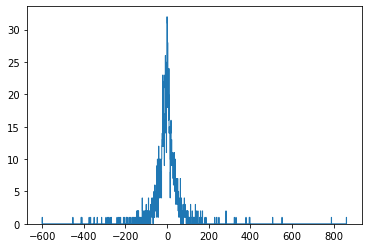

Degree promedio:  -3.124331550802139
Std de degrees:  75.3685191976763
Densidad: 0.07412497987945559
Info: Graph with 1496 nodes and 82891 edges
Average Clustering: 0.5945899313932108
Degrees de los nodos ordenados de mayor a menor:


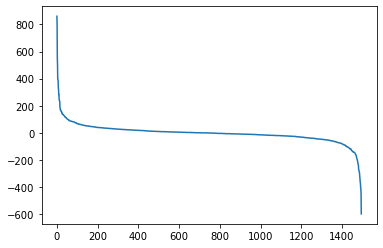

In [41]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 7: Nombres de Hombre


In [42]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df = pd.read_csv('Datos/names.csv')
df.head(10)

,Year,Name,Gender,Births,Rank
0,2020,Liam,M,19659,1
1,2020,Noah,M,18252,2
2,2020,Oliver,M,14147,3
3,2020,Elijah,M,13034,4
4,2020,William,M,12541,5
5,2020,James,M,12250,6
6,2020,Benjamin,M,12136,7
7,2020,Lucas,M,11281,8
8,2020,Henry,M,10705,9
9,2020,Alexander,M,10151,10


In [43]:
df_ult = df[df["Year"]==1998]
df_ult = df_ult[df_ult["Gender"]=="M"]
df_ult = df_ult[["Rank","Name"]]
df_ult = df_ult.sort_values(by=['Name'])
df_ult

,Rank,Name
44036,37,Aaron
44975,976,Abdul
44897,898,Abdullah
44377,378,Abel
44209,210,Abraham
...,...,...
44344,345,Zackery
44767,768,Zakary
44266,267,Zane
44699,700,Zechariah


In [44]:
df_ant = df[df["Year"]==1995]
df_ant = df_ant[df_ant["Gender"]=="M"]
df_ant = df_ant[["Rank","Name"]]
df_ant = df_ant.sort_values(by=['Name'])
df_ant

,Rank,Name
50029,30,Aaron
50986,987,Abdul
50339,340,Abel
50231,232,Abraham
50851,852,Abram
...,...,...
50242,243,Zackary
50319,320,Zackery
50773,774,Zakary
50330,331,Zane


In [45]:
nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

907

In [46]:
lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 0]
lista_ult

array([37, 976, 378, 210, 935, 45, 533, 549, 604, 790, 71, 635, 401, 594,
       196, 545, 161, 259, 246, 783, 651, 112, 95, 56, 22, 921, 855, 148,
       464, 539, 294, 394, 452, 239, 738, 524, 887, 569, 444, 441, 966,
       871, 193, 899, 157, 9, 223, 81, 303, 19, 554, 672, 79, 833, 720,
       872, 837, 474, 224, 658, 710, 602, 863, 291, 289, 794, 686, 278,
       827, 598, 925, 532, 10, 878, 656, 247, 795, 732, 153, 993, 610,
       448, 563, 873, 30, 486, 852, 616, 791, 331, 498, 85, 834, 325, 579,
       251, 835, 101, 777, 163, 759, 309, 7, 792, 909, 931, 323, 283, 99,
       245, 318, 274, 534, 896, 249, 677, 605, 133, 41, 527, 279, 970,
       350, 874, 731, 383, 74, 313, 94, 321, 422, 336, 463, 42, 203, 522,
       35, 461, 260, 994, 69, 687, 218, 189, 170, 419, 168, 186, 801, 208,
       173, 48, 453, 67, 706, 407, 26, 5, 564, 735, 393, 150, 654, 696,
       778, 589, 922, 575, 43, 220, 77, 528, 122, 130, 760, 492, 105, 192,
       47, 333, 613, 254, 322, 531, 115, 702, 763

In [47]:
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


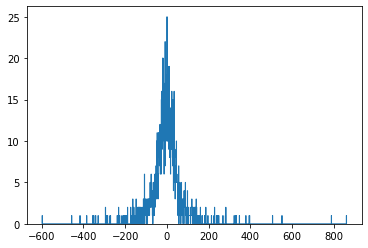

Degree promedio:  -2.3302139037433154
Std de degrees:  83.73667534808129
Densidad: 0.1054325469926493
Info: Graph with 1496 nodes and 117901 edges
Average Clustering: 0.4962484013892584
Degrees de los nodos ordenados de mayor a menor:


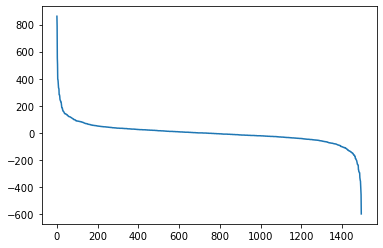

In [48]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 8: Nombres de Mujer


In [49]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df = pd.read_csv('Datos/names.csv')
df.head(10)

,Year,Name,Gender,Births,Rank
0,2020,Liam,M,19659,1
1,2020,Noah,M,18252,2
2,2020,Oliver,M,14147,3
3,2020,Elijah,M,13034,4
4,2020,William,M,12541,5
5,2020,James,M,12250,6
6,2020,Benjamin,M,12136,7
7,2020,Lucas,M,11281,8
8,2020,Henry,M,10705,9
9,2020,Alexander,M,10151,10


In [50]:
df_ult = df[df["Year"]==2015]
df_ult = df_ult[df_ult["Gender"]=="F"]
df_ult = df_ult[["Rank","Name"]]
df_ult = df_ult.sort_values(by=['Name'])
df_ult

,Rank,Name
11047,48,Aaliyah
11436,437,Abby
11006,7,Abigail
11980,981,Abril
11356,357,Ada
...,...,...
11895,896,Zion
11032,33,Zoe
11022,23,Zoey
11760,761,Zoie


In [51]:
df_ant = df[df["Year"]==2012]
df_ant = df_ant[df_ant["Gender"]=="F"]
df_ant = df_ant[["Rank","Name"]]
df_ant = df_ant.sort_values(by=['Name'])
df_ant

,Rank,Name
17035,36,Aaliyah
17789,790,Abbie
17620,621,Abbigail
17307,308,Abby
17006,7,Abigail
...,...,...
17777,778,Zion
17029,30,Zoe
17019,20,Zoey
17570,571,Zoie


In [52]:
nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

892

In [53]:
lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 0]
lista_ult

array([48, 437, 7, 981, 357, 132, 124, 335, 24, 584, 445, 273, 643, 545,
       135, 194, 276, 828, 186, 293, 850, 513, 916, 339, 492, 837, 176,
       202, 528, 509, 759, 726, 572, 223, 444, 461, 449, 596, 277, 32,
       100, 212, 317, 87, 612, 736, 86, 364, 172, 922, 338, 945, 913, 215,
       931, 163, 675, 256, 39, 872, 359, 687, 347, 679, 93, 316, 730, 458,
       476, 213, 334, 12, 639, 958, 303, 380, 671, 705, 304, 158, 902,
       211, 864, 737, 617, 861, 216, 406, 117, 289, 220, 425, 164, 951,
       567, 589, 580, 595, 249, 897, 44, 621, 396, 92, 895, 409, 566, 323,
       568, 619, 550, 403, 196, 777, 29, 514, 46, 56, 137, 400, 352, 663,
       201, 832, 721, 85, 332, 375, 908, 372, 157, 79, 21, 995, 471, 775,
       37, 690, 78, 69, 4, 658, 712, 390, 16, 661, 751, 893, 265, 814,
       367, 582, 936, 852, 551, 108, 865, 407, 569, 923, 74, 418, 381,
       603, 423, 356, 469, 466, 563, 665, 802, 793, 644, 419, 82, 533,
       360, 128, 918, 408, 446, 462, 150, 31, 170, 783,

In [54]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


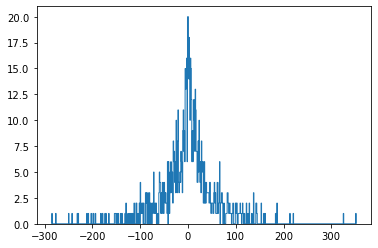

Degree promedio:  -1.1255605381165918
Std de degrees:  62.22182883386016
Densidad: 0.12533405806948408
Info: Graph with 892 nodes and 49806 edges
Average Clustering: 0.5555079370575448
Degrees de los nodos ordenados de mayor a menor:


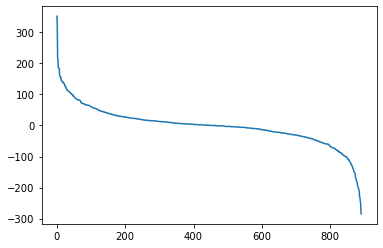

In [55]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()

### Ejemplo 9: Celebridades

In [63]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df = pd.read_csv('Datos/celebrities.csv')
df.head(10)

,Name,Year,Rank,Occupation
0,Kylie Jenner,2020,1,TV Personality
1,Kanye West,2020,2,Rapper/Producer
2,Roger Federer,2020,3,Tennis Player
3,Cristiano Ronaldo,2020,4,Soccer Player
4,Lionel Messi,2020,5,Soccer Player
5,Tyler Perry,2020,6,Director/Producer
6,Neymar,2020,7,Soccer Player
7,Howard Stern,2020,8,Radio Host
8,LeBron James,2020,9,Basketball Player
9,Dwayne Johnson,2020,10,Actor/Wrestler


In [64]:
df_ult = df[df["Year"]==2020]
df_ult = df_ult[["Rank","Name"]]
df_ult = df_ult.sort_values(by=['Name'])
df_ult

,Rank,Name
75,76,Adam Sandler
51,52,Akshay Kumar
98,99,Angelina Jolie
56,57,Anthony Joshua
16,17,Ariana Grande
...,...,...
5,6,Tyler Perry
33,34,Tyson Fury
88,89,U2
39,40,Vin Diesel


In [65]:
df_ant = df[df["Year"]==2019]
df_ant = df_ant[["Rank","Name"]]
df_ant = df_ant.sort_values(by=['Name'])
df_ant

,Rank,Name
180,81,Aaron Donald
115,16,Aaron Rodgers
145,46,Adam Sandler
132,33,Akshay Kumar
149,50,Anthony Joshua
...,...,...
184,85,The Rolling Stones
188,89,The Weeknd
133,34,Tiger Woods
139,40,Travis Scott


In [66]:
nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

68

In [67]:
lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 0]
lista_ult

array([76, 52, 57, 17, 47, 91, 73, 53, 4, 95, 92, 60, 22, 49, 67, 10, 23,
       12, 14, 55, 19, 8, 29, 80, 54, 15, 42, 56, 46, 51, 2, 86, 24, 84,
       48, 1, 74, 87, 9, 41, 5, 62, 35, 79, 7, 68, 93, 77, 58, 61, 3, 44,
       11, 36, 30, 38, 71, 97, 39, 45, 72, 16, 25, 21, 75, 32, 26, 83],
      dtype=object)

In [68]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


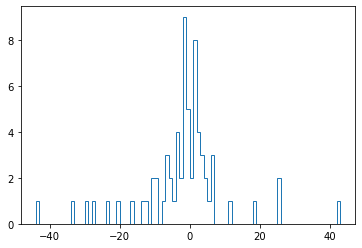

Degree promedio:  -2.6470588235294117
Std de degrees:  12.487363855328447
Densidad: 0.2923617208077261
Info: Graph with 68 nodes and 666 edges
Average Clustering: 0.5791610950232713
Degrees de los nodos ordenados de mayor a menor:


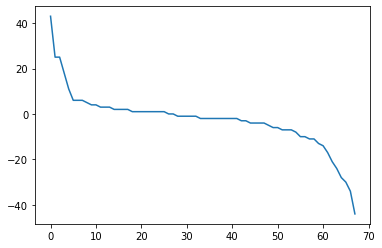

In [69]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()


### Ejemplo 10: Cities

In [70]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df = pd.read_csv('Datos/cities.csv')
df.head(10)

,rank,city,state,2020_census,2010_census,percent_change,land_area_mi,land_area_km,pop_density_mi,pop_density_km,degrees_north,degrees_west
0,1,New York,New York,8804190,8175133.0,7.69,300.5,778.3,29298,11312,40.66,73.93
1,2,Los Angeles,California,3898747,3792621.0,2.80,469.5,1216.0,8304,3206,34.01,118.41
2,3,Chicago,Illinois,2746388,2695598.0,1.88,227.7,589.7,12061,4657,41.83,87.68
3,4,Houston,Texas,2304580,2099451.0,9.77,640.4,1658.6,3599,1390,29.78,95.39
4,5,Phoenix,Arizona,1608139,1445632.0,11.24,518.0,1341.6,3105,1199,33.57,112.09
5,6,Philadelphia,Pennsylvania,1603797,1526006.0,5.10,134.4,348.1,11933,4607,40.00,75.13
6,7,San Antonio,Texas,1434625,1327407.0,8.08,498.8,1291.9,2876,1110,29.47,98.52
7,8,San Diego,California,1386932,1307402.0,6.08,325.9,844.1,4256,1643,32.81,117.13
8,9,Dallas,Texas,1304379,1197816.0,8.90,339.6,879.6,3841,1483,32.79,96.76
9,10,San Jose,California,1013240,945942.0,7.11,178.3,461.8,5683,2194,37.29,121.81


In [71]:
df_ult = df[["2020_census","city"]].dropna()
df_ult = df_ult.sort_values(by=['city'])
df_ult

,2020_census,city
227,125182,Abilene
135,190469,Akron
31,564559,Albuquerque
162,159467,Alexandria
305,104627,Allen
...,...,...
252,115451,Wilmington
88,249545,Winston-Salem
308,103639,Woodbridge
112,206518,Worcester


In [72]:
df_ant = df[["2010_census","city"]].dropna()
df_ant = df_ant.sort_values(by=['city'])
df_ant

,2010_census,city
227,117063.0,Abilene
135,199110.0,Akron
31,545852.0,Albuquerque
162,139966.0,Alexandria
305,84246.0,Allen
...,...,...
252,106476.0,Wilmington
88,229617.0,Winston-Salem
308,99585.0,Woodbridge
112,181045.0,Worcester


In [73]:
nodos = np.intersect1d(np.unique(df_ant["city"]),np.unique(df_ult["city"]))
len(nodos)

312

In [74]:
lista_ant =  np.array(df_ant.loc[df_ant['city'].isin(nodos)])[: , 0]
lista_ult =  np.array(df_ult.loc[df_ult['city'].isin(nodos)])[: , 0]
lista_ult

array([125182, 190469, 564559, 159467, 104627, 125845, 200393, 346824,
       291247, 123851, 115291, 394266, 124402, 127315, 498715, 202081,
       386261, 180542, 961855, 403455, 585708, 227470, 115282, 151854,
       124321, 117116, 200733, 235684, 675647, 108250, 148654, 105643,
       113540, 186738, 278349, 107337, 118403, 194016, 114746, 133434,
       174721, 137710, 108418, 275987, 150227, 874579, 181099, 249422,
       2746388, 101475, 275487, 309317, 166722, 117292, 372624, 100513,
       120124, 120511, 478961, 136632, 126254, 206922, 905748, 105240,
       125410, 134394, 157136, 317863, 111918, 1304379, 104901, 101724,
       105691, 137644, 109976, 139869, 715522, 214133, 639111, 114355,
       283506, 100243, 107588, 106215, 109450, 678815, 114797, 137298,
       176124, 151038, 176654, 117298, 110629, 119881, 125990, 208501,
       101030, 208393, 169810, 182760, 263886, 918915, 230504, 542107,
       200509, 143617, 141085, 171949, 246018, 267918, 248325, 196543,
    

In [75]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


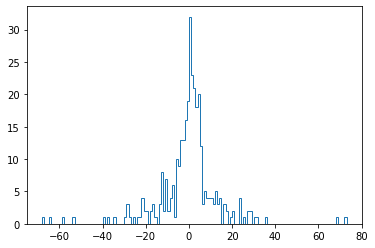

Degree promedio:  -0.7446153846153846
Std de degrees:  13.77241424307446
Densidad: 0.07580246913580246
Info: Graph with 325 nodes and 3991 edges
Average Clustering: 0.5947835005372061
Degrees de los nodos ordenados de mayor a menor:


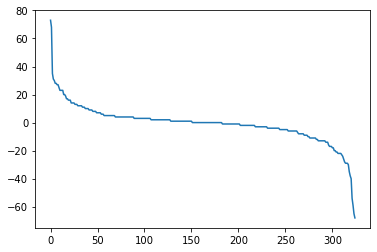

In [76]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()

 ### Ejemplo 11: Chess

In [77]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df_ult = pd.read_csv('Datos/ESM/Chess_FIDE/data/apr13.csv')[0:3000]
df_ult = df_ult.dropna()
df_ult.head(10)

,num,val
0,4100018,2812
1,13300474,2809
2,4101588,2801
3,13400924,2793
4,14109603,2786
5,5000017,2783
6,2020009,2772
7,2900084,2771
8,2016192,2767
9,13401319,2766


In [80]:
df_ant = pd.read_csv('Datos/ESM/Chess_FIDE/data/apr14.csv')[0:3000]
df_ant = df_ant.dropna()
df_ant.head(10)

,num,val
0,1503014,2881
1,13300474,2812
2,4100018,2812
3,5000017,2785
4,4101588,2783
5,2020009,2783
6,4126025,2777
7,2900084,2772
8,14109603,2772
9,2016192,2772


In [81]:
df_ant = df_ant.sort_values(by=['num'])
df_ult = df_ult.sort_values(by=['num'])


nodos = np.intersect1d(np.unique(df_ant["num"]),np.unique(df_ult["num"]))
len(nodos)

2801

In [82]:
lista_ant =  np.array(df_ant.loc[df_ant['num'].isin(nodos)])[: , 1]
lista_ult =  np.array(df_ult.loc[df_ult['num'].isin(nodos)])[: , 1]

In [83]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)

Histograma de degrees


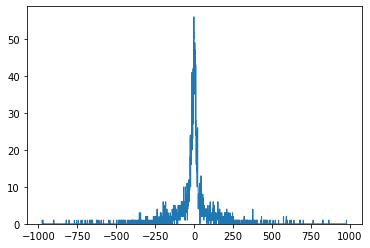

Degree promedio:  -5.903605855051767
Std de degrees:  145.79257341843692
Densidad: 0.079516499209466
Info: Graph with 2801 nodes and 311816 edges
Average Clustering: 0.5931354989056933
Degrees de los nodos ordenados de mayor a menor:


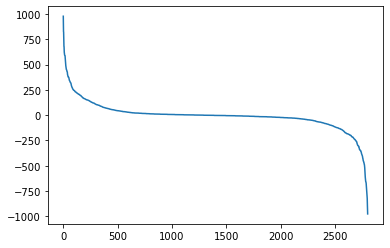

In [84]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step")
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()

### Ejemplo 12: Poker

In [85]:
# Tenemos una lista de las mejores universidade del mundo para distintos años
df_ult = pd.read_csv('Datos/ESM/Poker_GPI/data/2012-06-25.csv')
df_ult = df_ult.dropna()
df_ult.head(10)

,Name,Val
0,BertrandGrospellier,2859.50
1,JasonMercier,2781.56
2,SteveO'Dwyer,2605.24
3,MarvinRettenmaier,2586.10
4,EugeneKatchalov,2505.80
5,SorelMizzi,2503.61
6,ShawnBuchanan,2494.71
7,DavidSands,2455.62
8,ErikSeidel,2407.73
9,VanessaSelbst,2388.30


In [86]:
df_ant = pd.read_csv('Datos/ESM/Poker_GPI/data/2012-07-02.csv')
df_ant = df_ant.dropna()
df_ant.head(10)

,Name,Val
0,JasonMercier,2758.08
1,BertrandGrospellier,2756.49
2,MarvinRettenmaier,2586.10
3,SteveO'Dwyer,2580.52
4,VanessaSelbst,2474.26
5,ShawnBuchanan,2466.64
6,DavidSands,2455.62
7,EugeneKatchalov,2439.37
8,NoahSchwartz,2410.62
9,MichaelMizrachi,2407.30


In [87]:
df_ant = df_ant.sort_values(by=['Name'])
df_ult = df_ult.sort_values(by=['Name'])


nodos = np.intersect1d(np.unique(df_ant["Name"]),np.unique(df_ult["Name"]))
len(nodos)

df_ant

,Name,Val
1008,A.J.Jejelowo,549.55
579,AadamDaya,784.84
419,AageRavn,935.61
257,AaronJones,1144.90
1777,AaronMassey,365.25
...,...,...
605,ZohairKarim,763.64
632,ZoltanSzabo,739.30
1225,ZsoltVizsnyiczai,473.63
1226,ZuoWang,473.35


In [88]:
lista_ant = df_ant.loc[df_ant['Name'].isin(nodos)]
lista_ult = df_ult.loc[df_ult['Name'].isin(nodos)]

In [89]:
lista_ant =  np.array(df_ant.loc[df_ant['Name'].isin(nodos)])[: , 1]
lista_ult =  np.array(df_ult.loc[df_ult['Name'].isin(nodos)])[: , 1]

lista_ult

array([549.55, 605.05, 935.61, ..., 473.63, 473.35, 504.99], dtype=object)

In [90]:
G = nx.Graph()
for i in range(len(lista_ant)):
    G.add_node(i)

for i in range(len(lista_ant)):
    for j in range(i+1,len(lista_ant)):
        rank_ult_i = lista_ult[i]
        rank_ult_j = lista_ult[j]
        
        rank_ant_i = lista_ant[i]
        rank_ant_j = lista_ant[j]
        
        if rank_ult_i < rank_ult_j and rank_ant_i > rank_ant_j:
            G.add_edge(j,i,peso=1)
#             G.add_edge(j,i)
            
        if rank_ult_i > rank_ult_j and rank_ant_i < rank_ant_j:
            G.add_edge(j,i,peso=-1)
#             G.add_edge(i,j)
        
#         # Si la diferencia de rangos cambió de signo, unimos los nodos
#         if (rank_ult_i - rank_ult_j)*(rank_ant_i-rank_ant_j) < 0:
#             G.add_edge(i,j)
# nx.draw_circular(G)


Histograma de degrees


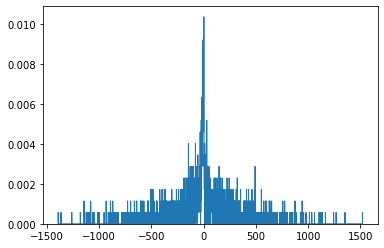

Degree promedio:  -7.521337946943484
Std de degrees:  346.57779285422964
Densidad: 0.458249556908402
Info: Graph with 1734 nodes and 688525 edges
Average Clustering: 0.6353169160765598
Degrees de los nodos ordenados de mayor a menor:


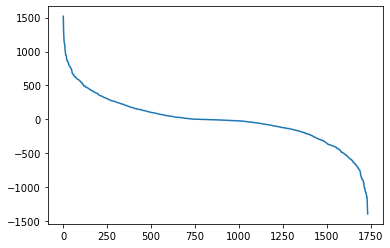

In [91]:
degrees = [G.degree(i,weight="peso") for i in G.nodes()]
a,b,c = plt.hist(degrees, bins=max(degrees)-min(degrees),histtype="step",density=True)
# plt.plot(nx.degree_histogram(G),"-o")
print("Histograma de degrees")
plt.show()
print("Degree promedio: ", np.mean(degrees))
print("Std de degrees: ", np.std(degrees))
print("Densidad:", nx.density(G))
print("Info:", nx.info(G))
print("Average Clustering:", nx.average_clustering(G))
# plt.hist(nx.clustering(G).values(),bins=30)
# print("Grafica del Clustering:")
# plt.show()

print("Degrees de los nodos ordenados de mayor a menor:")
degrees.sort(reverse=True)
plt.plot(degrees)
plt.show()